# Simple Traffic Light Classifier

## Analytical approach for the dentification of traffic light colors

This approach to identify traffic light states is based on the fact that every active light bulb has a higher illumination and therefore 
Procedure:
1. Load image
2. Convert image into grayscale
3. Extract a black and white image based on a threshold 
4. Divide b/w image into three parts (representing the light bulbs)
5. Count the amount of pixes !=0
6. Compare the amount of white pixels 
7. Derive active traffic light state

In [1]:
import cv2
from matplotlib import pyplot as plt
import glob
import os
import random
import math
import numpy as np
%matplotlib inline

Load example image

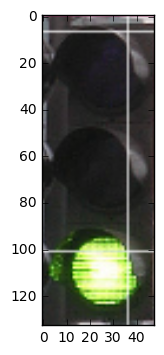

In [8]:
im = cv2.imread('dom_test/b.png')
plt.imshow(im)

In [ ]:
Convert example image to grayscale

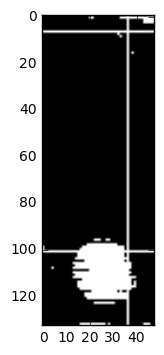

In [35]:
gray_img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='gray')

Devide image into three parts along the x-axis

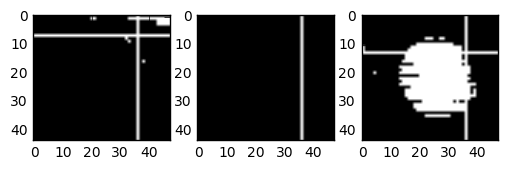

In [36]:
third = thresh.shape[0]/3
onethird_x = int(thresh.shape[0]/3)
part_one = thresh[0:onethird_x][:]
part_two = thresh[onethird_x:onethird_x*2][:]
part_three = thresh[onethird_x*2:onethird_x*3][:]

plt.subplot(131)
plt.imshow(part_one, cmap='gray')
plt.subplot(132)
plt.imshow(part_two, cmap='gray')
plt.subplot(133)
plt.imshow(part_three, cmap='gray')

Get state

In [22]:
red_dominance = np.count_nonzero(part_one)
yellow_dominance = np.count_nonzero(part_two)
green_dominance = np.count_nonzero(part_three)

traffic_light = [red_dominance, yellow_dominance, green_dominance]
label =['red', 'yellow', 'green']
print(label[traffic_light.index(max(traffic_light))])

green


# Example on dataset recorded with autonomous vehicle

### load dataset, only consider traffic light colors

In [2]:
image_types = ["red", "green", "yellow"]
input_img_x = 32
input_img_y = 32

full_set = []
for im_type in image_types:
    for ex in glob.glob(os.path.join("carla/", im_type, "*")):
        im = cv2.imread(ex)
        if not im is None:
            # Resize image to defined height and width
            im = cv2.resize(im, (input_img_x, input_img_y))
            # Convert to RGB...cv2 import is BGR
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 
            # One hot encode the classes
            one_hot_array = [0] * len(image_types)
            one_hot_array[image_types.index(im_type)] = 1
            # Check shape
            assert(im.shape == (input_img_x, input_img_y, 3))
            full_set.append((im, one_hot_array, ex))

# Shuffle the data
random.shuffle(full_set)
print("Loaded train images, overall amount of images: {}".format(len(full_set)))

Loaded train images, overall amount of images: 480


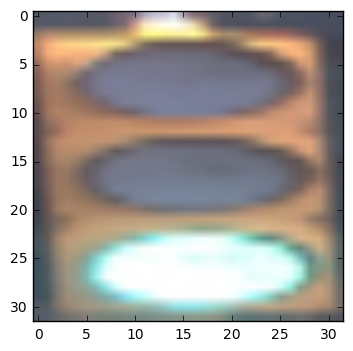

In [30]:
plt.imshow(full_set[0][0])

Define region extraction based on black and white threshold

In [31]:
def get_dominant_region(image):
    # get gray image
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #convert to black and white
    black_and_white_image = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY)[1]
    # get one third of x axis
    onethird_of_x = int(black_and_white_image.shape[0] / 3)
    # divide
    part_one = black_and_white_image[0:onethird_of_x][:]
    part_two = black_and_white_image[onethird_of_x:onethird_of_x * 2][:]
    part_three = black_and_white_image[onethird_of_x * 2:onethird_of_x * 3][:]
    # get brightest part
    red_dominance = np.count_nonzero(part_one)
    yellow_dominance = np.count_nonzero(part_two)
    green_dominance = np.count_nonzero(part_three)

    traffic_light = [red_dominance, yellow_dominance, green_dominance]
    label =['red', 'yellow', 'green']
    # return state
    return label[traffic_light.index(max(traffic_light))]


In [34]:
print(get_dominant_region(full_set[0][0]))

green
